In [1]:
import csv

In [2]:
# format: student_ID (int), classname (str), gender (M, F, Unknown)
with open("data/original/metadata_2013.txt", 'r') as infile:
    reader = csv.reader(infile, delimiter="\t")
    for id, cls, gender in reader:
        print(int(id), cls, gender)


650 2BIO1 F
498 2BIO1 F
627 2BIO1 F
857 2BIO1 F
487 2BIO1 F
28 2BIO2 M
927 2BIO1 F
72 2BIO1 F
400 2BIO1 F
945 2BIO1 F
637 2BIO1 F
443 2BIO1 F
177 2BIO1 F
984 2BIO1 F
954 2BIO1 F
859 2BIO1 M
489 2BIO1 F
991 2BIO1 M
62 2BIO1 F
428 2BIO1 M
145 2BIO1 F
471 2BIO1 F
65 2BIO1 M
809 2BIO1 F
681 2BIO1 F
970 2BIO1 F
854 2BIO1 F
486 2BIO1 F
531 2BIO1 F
725 2BIO1 M
527 2BIO1 M
465 2BIO1 F
674 2BIO1 F
677 2BIO1 M
475 2BIO1 M
124 2BIO1 F
111 2BIO1 F
478 2BIO2 F
226 2BIO2 F
160 2BIO2 F
372 2BIO2 M
464 2BIO2 F
763 2BIO2 F
886 2BIO2 F
544 2BIO2 M
63 2BIO3 F
720 2BIO2 F
3 2BIO2 M
407 2BIO2 M
171 2BIO2 M
46 2BIO2 F
165 2BIO2 F
441 2BIO2 F
257 2BIO2 F
239 2BIO2 F
27 2BIO2 M
173 2BIO2 F
477 2BIO2 M
312 2BIO2 F
612 2BIO2 F
339 2BIO2 F
884 2BIO2 F
61 2BIO2 F
147 2BIO2 M
327 2BIO2 M
353 2BIO2 M
504 2BIO2 F
429 2BIO2 M
268 2BIO2 F
184 2BIO2 M
295 2BIO2 F
1 2BIO3 M
265 2BIO3 F
39 2BIO3 F
494 2BIO3 M
106 2BIO3 F
272 2BIO3 F
55 2BIO3 F
779 2BIO3 F
170 2BIO3 F
447 2BIO3 F
119 2BIO3 F
425 2BIO3 F
545 2BIO3 F
202 2B

In [3]:
id_class = []
with open("data/original/High-School_data_2013.csv", 'r') as infile:
    reader = csv.reader(infile, delimiter=" ")
    for t, id1, id2, cls1, cls2 in reader:
        id_class.append((int(id1), cls1));
        id_class.append((int(id2), cls2));
id_class.sort(key = lambda x: x[0])

#key is id, value is occurances
id_occurances = {} #dictionary so I can search for keys
for i in id_class:
    if i[0] in id_occurances:
        id_occurances[i[0]] += 1
    else:
        id_occurances[i[0]] = 1
#print(id_occurances)

#key is tuple from id_class, value is occurances
id_class_occurances = {}
for i in id_class:
    if i in id_class_occurances:
        id_class_occurances[i] += 1
    else:
        id_class_occurances[i] = 1

#sort based on id (the first value in the tuple) in id_class_occurances
sorted(id_class_occurances, key = lambda x: x[0])


[(1, '2BIO3'),
 (3, '2BIO2'),
 (4, 'PSI*'),
 (9, 'PC'),
 (14, 'PC*'),
 (15, 'PC'),
 (20, 'MP*1'),
 (21, 'PC'),
 (27, '2BIO2'),
 (28, '2BIO1'),
 (32, 'PSI*'),
 (34, 'MP'),
 (38, 'MP'),
 (39, '2BIO3'),
 (41, 'MP'),
 (45, 'PC'),
 (46, '2BIO2'),
 (47, 'PSI*'),
 (48, 'PC'),
 (54, 'MP'),
 (55, '2BIO3'),
 (58, 'PC*'),
 (61, '2BIO2'),
 (62, '2BIO1'),
 (63, '2BIO3'),
 (65, '2BIO1'),
 (70, '2BIO3'),
 (71, 'PC'),
 (72, '2BIO1'),
 (79, 'PC'),
 (80, 'PC'),
 (85, 'PC*'),
 (87, 'PC'),
 (89, 'PC'),
 (90, 'PSI*'),
 (92, 'PC'),
 (101, '2BIO3'),
 (103, 'MP*1'),
 (106, '2BIO3'),
 (111, '2BIO1'),
 (115, 'PC*'),
 (116, 'PC*'),
 (117, '2BIO3'),
 (119, '2BIO3'),
 (120, 'PC'),
 (122, '2BIO3'),
 (124, '2BIO1'),
 (125, 'PSI*'),
 (131, 'PC*'),
 (132, '2BIO3'),
 (134, 'PC'),
 (145, '2BIO1'),
 (147, '2BIO2'),
 (149, 'MP*1'),
 (151, 'MP'),
 (156, 'MP'),
 (159, 'MP'),
 (160, '2BIO2'),
 (165, '2BIO2'),
 (170, '2BIO3'),
 (171, '2BIO2'),
 (172, 'PC'),
 (173, '2BIO2'),
 (176, 'PC*'),
 (177, '2BIO1'),
 (179, '2BIO3'),
 (1

^^ I ran `sort -n id-class-occurances.txt | cut -f1 |uniq | wc -l` and `sort -n id-class-occurances.txt | cut -f1 | wc -l` in a bash and got 327 for both, so that means that there were no duplicate student IDs, and each student is only ever listed under one class in both the metadata and dynamic contacts.

In [4]:
with open("data/original/High-School_data_2013.csv", 'r') as infile:
    reader = csv.reader(infile, delimiter=" ")
    i = 0
    for t, id1, id2, cls1, cls2 in reader:
        i += 1
        if cls1 != cls2:
            print(str(i) + " " + str(t))

810 1385982380
851 1385982400
895 1385982420
896 1385982420
1090 1385982500
1143 1385982520
1184 1385982540
1244 1385982560
1250 1385982560
1288 1385982580
1295 1385982580
1301 1385982580
1315 1385982600
1318 1385982600
1319 1385982600
1329 1385982600
1331 1385982600
1344 1385982600
1351 1385982600
1360 1385982600
1366 1385982620
1367 1385982620
1371 1385982620
1381 1385982620
1383 1385982620
1407 1385982620
1440 1385982640
1473 1385982660
1476 1385982660
1494 1385982660
1519 1385982680
1521 1385982680
1530 1385982680
1531 1385982680
1536 1385982680
1554 1385982680
1565 1385982700
1566 1385982700
1569 1385982700
1584 1385982700
1590 1385982700
1610 1385982700
1616 1385982720
1617 1385982720
1625 1385982720
1629 1385982720
1630 1385982720
1638 1385982720
1662 1385982740
1663 1385982740
1669 1385982740
1670 1385982740
1674 1385982740
1677 1385982740
1689 1385982740
1692 1385982740
1695 1385982760
1696 1385982760
1698 1385982760
1708 1385982760
1711 1385982760
1715 1385982760
1722 1385982

10962 1385989620
10979 1385989620
10985 1385989620
10992 1385989620
11004 1385989640
11005 1385989640
11006 1385989640
11016 1385989640
11026 1385989640
11039 1385989660
11041 1385989660
11042 1385989660
11043 1385989660
11049 1385989660
11058 1385989660
11063 1385989660
11069 1385989660
11073 1385989660
11081 1385989680
11082 1385989680
11083 1385989680
11084 1385989680
11093 1385989680
11105 1385989680
11117 1385989700
11120 1385989700
11121 1385989700
11123 1385989700
11125 1385989700
11149 1385989720
11150 1385989720
11163 1385989720
11173 1385989720
11177 1385989720
11179 1385989720
11189 1385989740
11190 1385989740
11208 1385989740
11211 1385989740
11219 1385989740
11227 1385989740
11236 1385989760
11237 1385989760
11258 1385989760
11285 1385989780
11286 1385989780
11288 1385989780
11304 1385989780
11316 1385989780
11324 1385989800
11330 1385989800
11333 1385989800
11335 1385989800
11336 1385989800
11341 1385989800
11342 1385989800
11343 1385989800
11346 1385989800
11357 13859898

54177 1386069000
54652 1386069220
54653 1386069220
54657 1386069220
54695 1386069240
54696 1386069240
54713 1386069240
54732 1386069260
54734 1386069260
54735 1386069260
54737 1386069260
54744 1386069260
54765 1386069280
54767 1386069280
54769 1386069280
54788 1386069280
54791 1386069300
54793 1386069300
54800 1386069300
54815 1386069320
54838 1386069340
54841 1386069340
54848 1386069340
54849 1386069340
54850 1386069340
54860 1386069360
54861 1386069360
54865 1386069360
54866 1386069360
54876 1386069380
54881 1386069380
54883 1386069380
54892 1386069400
54893 1386069400
54900 1386069400
54909 1386069420
54912 1386069420
54917 1386069420
54930 1386069440
54931 1386069440
54932 1386069440
54938 1386069460
54940 1386069460
54941 1386069460
54943 1386069460
54945 1386069460
54951 1386069480
54953 1386069480
54957 1386069480
54964 1386069500
54967 1386069500
54973 1386069500
54975 1386069500
54979 1386069520
54980 1386069520
54981 1386069520
54988 1386069520
54989 1386069520
54998 13860695

64545 1386076580
64569 1386076600
64570 1386076600
67248 1386078760
69062 1386080520
69392 1386080840
69478 1386080920
69579 1386081000
70579 1386081840
70630 1386081860
70655 1386081880
70730 1386081940
71395 1386082580
72519 1386083460
72570 1386083500
72729 1386083560
72744 1386083580
72751 1386083580
72756 1386083580
72757 1386083580
72774 1386083580
72789 1386083580
72795 1386083600
72797 1386083600
72804 1386083600
72805 1386083600
72846 1386083620
72856 1386083620
72857 1386083620
72865 1386083620
72903 1386083640
72908 1386083640
72917 1386083640
72918 1386083640
72919 1386083640
72925 1386083640
72968 1386083660
72970 1386083660
72975 1386083660
72987 1386083660
73000 1386083660
73016 1386083660
73017 1386083660
73034 1386083680
73036 1386083680
73058 1386083680
73059 1386083680
73082 1386083680
73111 1386083700
73128 1386083700
73129 1386083700
73142 1386083700
73143 1386083700
73144 1386083700
73170 1386083720
73173 1386083720
73176 1386083720
73189 1386083720
73223 13860837

104250 1386159000
104251 1386159000
104252 1386159000
104256 1386159000
104258 1386159000
104259 1386159000
104260 1386159000
104283 1386159020
104285 1386159020
104291 1386159020
104292 1386159020
104293 1386159020
104309 1386159040
104310 1386159040
104312 1386159040
104313 1386159040
104317 1386159040
104325 1386159040
104335 1386159040
104346 1386159060
104350 1386159060
104351 1386159060
104352 1386159060
104354 1386159060
104358 1386159060
104362 1386159060
104373 1386159060
104382 1386159080
104383 1386159080
104385 1386159080
104386 1386159080
104387 1386159080
104388 1386159080
104395 1386159080
104397 1386159080
104422 1386159100
104423 1386159100
104427 1386159100
104428 1386159100
104429 1386159100
104432 1386159100
104440 1386159100
104445 1386159100
104446 1386159100
104466 1386159120
104468 1386159120
104469 1386159120
104477 1386159120
104484 1386159120
104485 1386159120
104507 1386159140
104510 1386159140
104511 1386159140
104512 1386159140
104517 1386159140
104520 138

127941 1386234600
127956 1386234600
127964 1386234600
127975 1386234600
127977 1386234600
127979 1386234600
127980 1386234600
127981 1386234600
127985 1386234600
127986 1386234600
128003 1386234600
128012 1386234620
128013 1386234620
128034 1386234620
128048 1386234620
128051 1386234620
128053 1386234620
128054 1386234620
128055 1386234620
128056 1386234620
128060 1386234620
128061 1386234620
128066 1386234620
128091 1386234640
128097 1386234640
128110 1386234640
128128 1386234640
128129 1386234640
128130 1386234640
128133 1386234640
128134 1386234640
128156 1386234640
128167 1386234660
128172 1386234660
128184 1386234660
128190 1386234660
128206 1386234660
128207 1386234660
128208 1386234660
128242 1386234680
128254 1386234680
128279 1386234680
128281 1386234680
128284 1386234680
128285 1386234680
128294 1386234680
128298 1386234680
128316 1386234700
128330 1386234700
128331 1386234700
128339 1386234700
128344 1386234700
128361 1386234700
128364 1386234700
128396 1386234720
128414 138

156003 1386315360
156025 1386315380
157970 1386317100
157997 1386317120
158331 1386317360
159531 1386318340
161001 1386319520
161118 1386319600
161994 1386320120
162038 1386320140
162040 1386320140
162066 1386320140
162099 1386320160
162109 1386320160
162110 1386320160
162111 1386320160
162124 1386320160
162134 1386320160
162150 1386320160
162159 1386320180
162160 1386320180
162172 1386320180
162173 1386320180
162174 1386320180
162191 1386320180
162193 1386320180
162205 1386320180
162227 1386320200
162228 1386320200
162230 1386320200
162231 1386320200
162232 1386320200
162237 1386320200
162239 1386320200
162246 1386320200
162248 1386320200
162254 1386320200
162260 1386320200
162261 1386320200
162264 1386320220
162275 1386320220
162278 1386320220
162279 1386320220
162295 1386320220
162297 1386320220
162298 1386320220
162299 1386320220
162306 1386320220
162315 1386320240
162323 1386320240
162328 1386320240
162330 1386320240
162331 1386320240
162334 1386320240
162335 1386320240
162340 138

182284 1386333440
182291 1386333440
182305 1386333460
182306 1386333460
182317 1386333480
182320 1386333480
182321 1386333480
182333 1386333500
182334 1386333500
182349 1386333520
182350 1386333520
182363 1386333540
182376 1386333560
182377 1386333560
182386 1386333580
182396 1386333600
182397 1386333600
182409 1386333620
182410 1386333620
182419 1386333640
182430 1386333660
182431 1386333660
182438 1386333660
182439 1386333660
182447 1386333680
182451 1386333680
182452 1386333680
182460 1386333700
182467 1386333700
182479 1386333720
182484 1386333740
182492 1386333740
182496 1386333760
182501 1386333760
182506 1386333780
182511 1386333780
182515 1386333780
182520 1386333800
182522 1386333800
182525 1386333800
182533 1386333820
182534 1386333820
182538 1386333840
182542 1386333840
182543 1386333840
182553 1386333860
182554 1386333860
182561 1386333880
182567 1386333880
182568 1386333880
182574 1386333900
182578 1386333900
182590 1386333920
182596 1386333940
182602 1386333940
182603 138

^^ I want to know when people are in contact with people not in their class

In [5]:
import networkx as nx
G=nx.DiGraph()

with open("data/original/Friendship-network_data_2013.csv", 'r') as infile:
    reader = csv.reader(infile, delimiter=" ")
    for id1, id2 in reader:
        G.add_edge(int(id1), int(id2));

print("V = ",G.number_of_nodes())
print("E = ",G.number_of_edges())

cc = nx.clustering(G)
degree = G.degree()
bc = nx.betweenness_centrality(G)

nx.set_node_attributes(G, cc, "clustering_coefficient")
nx.set_node_attributes(G, degree, "degree")
nx.set_node_attributes(G, bc, "betweenness_centrality")

#for n in G:
#    print(n, G[n])


V =  134
E =  668


^^ I want to know how many of the listed friendships are mutual

<IPython.core.display.Javascript object>


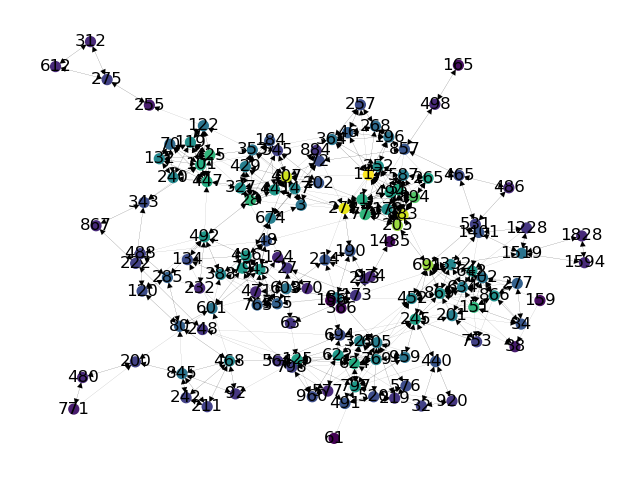

{1: 0.12781954887218044, 55: 0.12781954887218044, 205: 0.17293233082706766, 272: 0.19548872180451127, 494: 0.12030075187969924, 779: 0.13533834586466165, 894: 0.15037593984962405, 3: 0.08270676691729323, 28: 0.13533834586466165, 147: 0.09774436090225563, 407: 0.18796992481203006, 674: 0.09022556390977443, 884: 0.03759398496240601, 27: 0.03759398496240601, 63: 0.03759398496240601, 173: 0.03759398496240601, 202: 0.06015037593984962, 327: 0.10526315789473684, 353: 0.08270676691729323, 429: 0.09022556390977443, 441: 0.11278195488721804, 492: 0.11278195488721804, 545: 0.045112781954887216, 32: 0.045112781954887216, 440: 0.06015037593984962, 624: 0.12781954887218044, 797: 0.11278195488721804, 920: 0.03759398496240601, 34: 0.06015037593984962, 151: 0.13533834586466165, 277: 0.06766917293233082, 502: 0.08270676691729323, 866: 0.10526315789473684, 45: 0.11278195488721804, 48: 0.06015037593984962, 79: 0.11278195488721804, 335: 0.06766917293233082, 496: 0.11278195488721804, 601: 0.082706766917293

In [18]:
import matplotlib.pyplot as plt
#%matplotlib notebook

dcent = nx.degree_centrality(G)
#print(dcent)
mx = dcent[max(dcent.keys(), key=(lambda k: dcent[k]))]
mn = dcent[min(dcent.keys(), key=(lambda k: dcent[k]))]

dcent_color = [(dcent[i] - mn)/(mx - mn) for i in dcent]

#print(dcent_color)
bcent = nx.betweenness_centrality(G)
bcent_color = [bcent[i] for i in bcent]

ccent = nx.closeness_centrality(G)
ccent_color = [dcent[i] for i in ccent]


plt.figure(1)
nx.draw_kamada_kawai(G,with_labels=True,node_size=50,node_color=ccent_color,width=0.05)

plt.show()

print(dcent)

In [ ]:
nx.draw_networkx(G, with_labels=True)

In [ ]:
nx.draw_kamada_kawai(G,with_labels=True)

In [ ]:
nx.draw_circular(G, with_labels=True)

In [ ]:
import matplotlib.pyplot as plt
nx.draw_spring(G, with_labels=True)

In [ ]:
import visJS2jupyter.visJS_module
#G1=nx.connected_watts_strogatz_graph(30,5,.2)
nodes = G.nodes()
edges = G.edges()
nodes_dict = [{"id":n} for n in nodes]
print(nodes_dict)
node_map = dict(zip(nodes,range(len(nodes)))) # map to indices for source/target in edges
edges_dict = [{"source":node_map[edges[i][0]], "target":node_map[edges[i][1]],
                "title":'test'} for i in range(len(edges))]

visJS_module.visjs_network(nodes_dict, edges_dict, time_stamp=0)
